In [1]:
'스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업' '자동차 임대업' '전시 및 행사 대행업','정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점','택시 운송업''피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업',

('스포츠 및 레크레이션 용품 임대업',
 '여관업',
 '여행사업',
 '욕탕업',
 '육류 소매업',
 '일반유흥 주점업',
 '일식 음식점업자동차 임대업전시 및 행사 대행업',
 '정기 항공 운송업',
 '중식 음식점업',
 '차량용 가스 충전업',
 '차량용 주유소 운영업',
 '체인화 편의점',
 '택시 운송업피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '호텔업',
 '화장품 및 방향제 소매업',
 '휴양콘도 운영업')

In [2]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
inn = pd.read_csv("업종별/여관업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [4]:
print(inn.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334994 entries, 0 to 334993
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      334994 non-null  object
 1   CARD_SIDO_NM  334994 non-null  object
 2   CARD_CCG_NM   334793 non-null  object
 3   STD_CLSS_NM   334994 non-null  object
 4   HOM_SIDO_NM   334994 non-null  object
 5   HOM_CCG_NM    333238 non-null  object
 6   AGE           334994 non-null  object
 7   SEX_CTGO_CD   334994 non-null  int64 
 8   FLC           334994 non-null  int64 
 9   CSTMR_CNT     334994 non-null  int64 
 10  AMT           334994 non-null  int64 
 11  CNT           334994 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB
None


In [5]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [7]:
#안쓰는 컬럼 드랍
df=inn.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [8]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [9]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334994 entries, 0 to 334993
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      334994 non-null  object
 1   CARD_SIDO_NM  334994 non-null  object
 2   HOM_SIDO_NM   334994 non-null  object
 3   AGE           334994 non-null  object
 4   SEX_CTGO_CD   334994 non-null  int64 
 5   FLC           334994 non-null  int64 
 6   CSTMR_CNT     334994 non-null  int64 
 7   AMT           334994 non-null  int64 
 8   CNT           334994 non-null  int64 
 9   year          334994 non-null  int64 
 10  month         334994 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 30.7+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1        165   
1   201901           강원          강원  20s            1    2          8   
2   201901           강원          강원  20s            2  

In [10]:
df.CARD_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [11]:
df.HOM_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '인천',
       '제주', '충남', '충북', '울산', '전북', '전남'], dtype=object)

CARD_SIDO_NM
세종       91381352
충북     4152091559
울산     5598661304
대전     5738158142
전북     7100656950
경북     7531445081
광주     7781785030
충남     8235694553
제주     9059702658
강원    10594672811
전남    11047164905
대구    11534548197
경남    14654838414
인천    16531279130
부산    24669406381
서울    53054507799
경기    61528042264
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

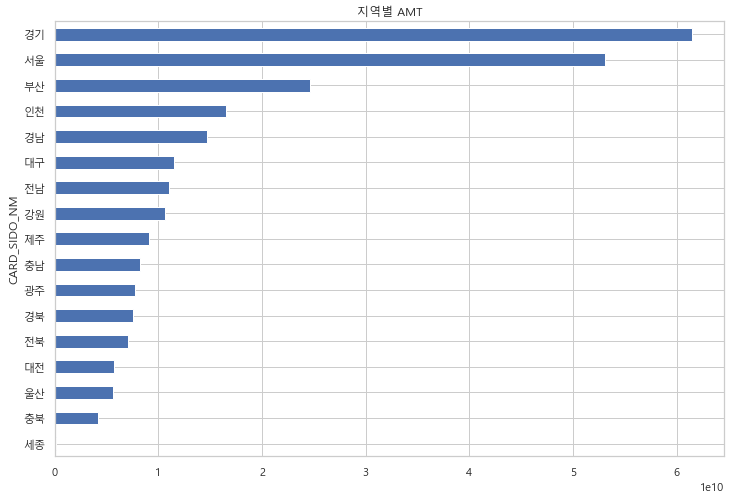

In [12]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh", figsize=(12,8))
plt.title("지역별 AMT")

REG_YYMM
201901    18884783157
201902    16301902580
201903    18379401518
201904    17244806643
201905    18089736599
201906    18294636983
201907    18914328276
201908    21181139265
201909    17525554284
201910    17436884461
201911    16387914971
201912    19189842409
202001    16906766618
202002    13005405169
202003    11160933597
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

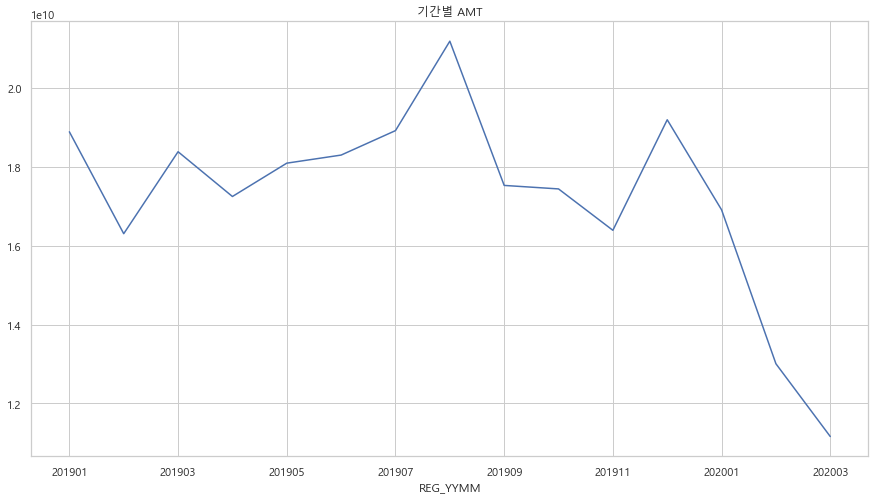

In [13]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

-소위 휴가철에 높아지는 양상

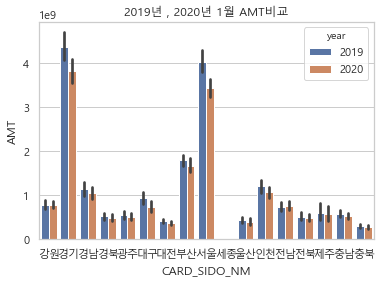

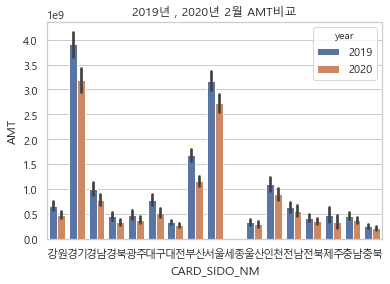

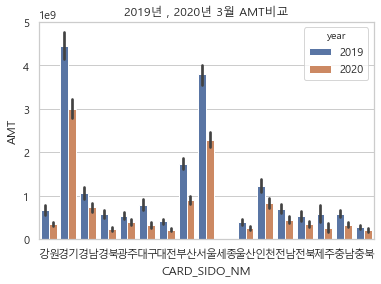

In [14]:
for i in range(1, 4):
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

-전반적으로 감소하는 양상 

AGE
10s      178110691
20s    66038349653
30s    66829264073
40s    51376665592
50s    56264908836
60s    16728585727
70s     1488151958
Name: AMT, dtype: int64


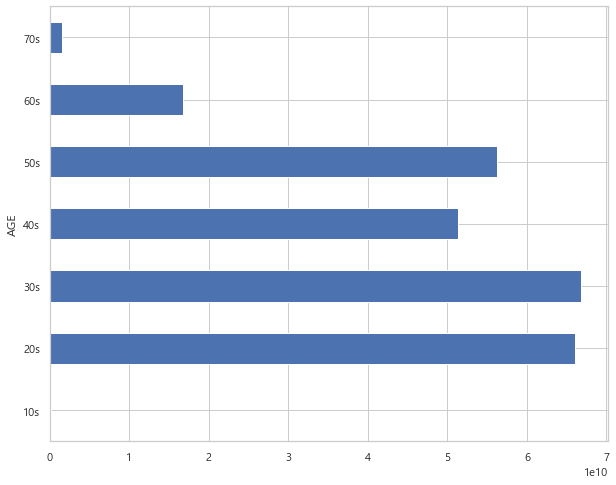

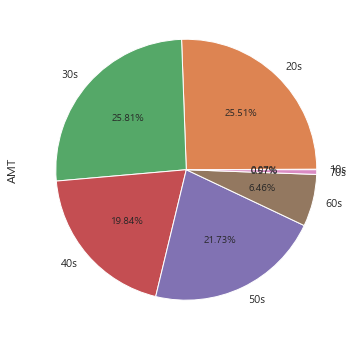

In [15]:
df3 = df.groupby('AGE')['AMT'].sum()
print(df3)
df3.plot(kind='barh', figsize=(10,8))
plt.show()
df3.plot(kind='pie',autopct='%1.2f%%',figsize=(6,6))

-젊은 청년층의 사용량이 높은 것을 볼 수 있다. 

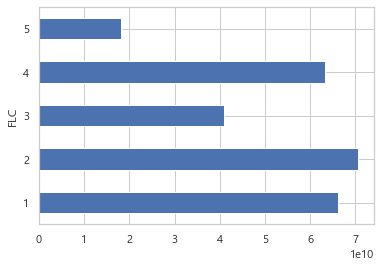

In [16]:
FLC = df.groupby('FLC')['AMT'].sum()
FLC.plot(kind='barh')

-1인가구, 영유아자녀 가구, 성인 자녀가구의 사용량이 큼

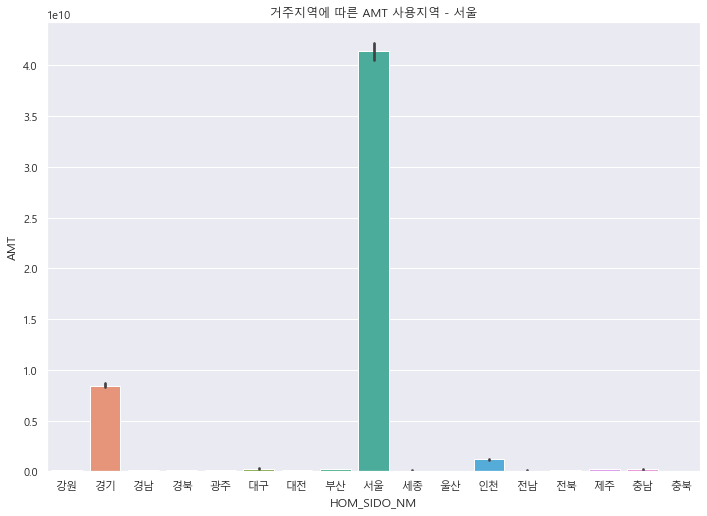

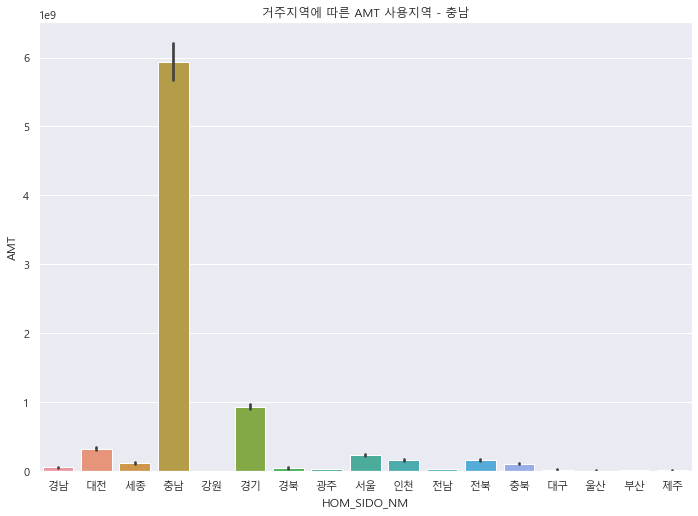

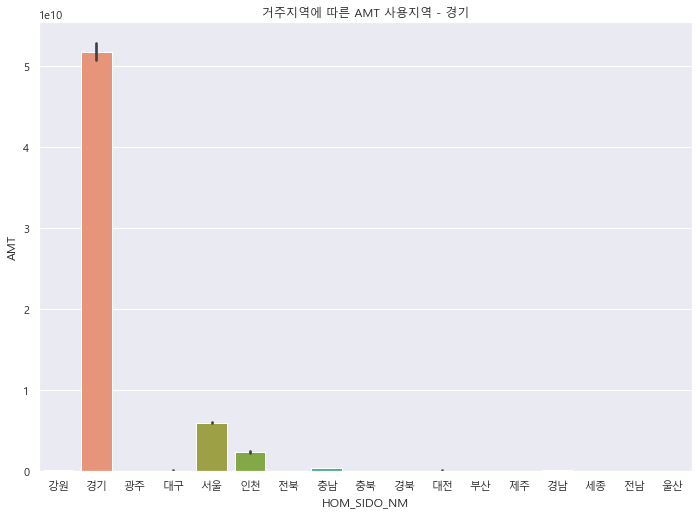

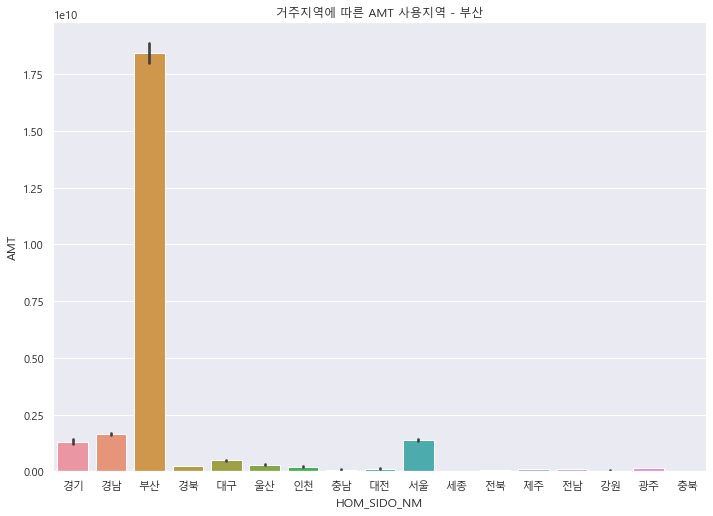

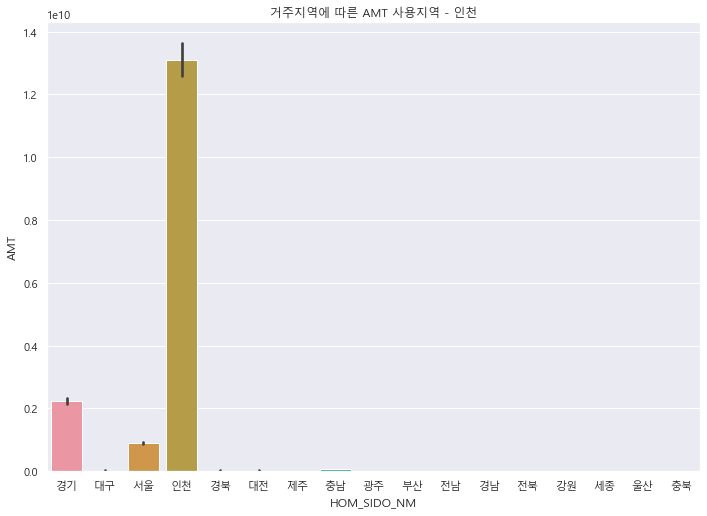

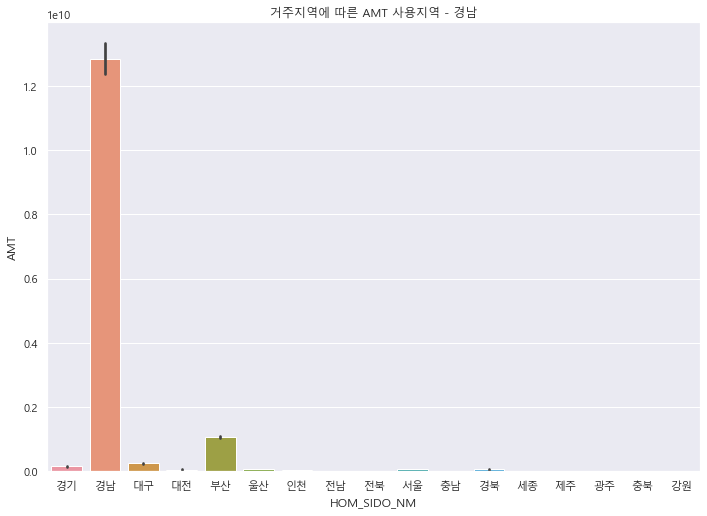

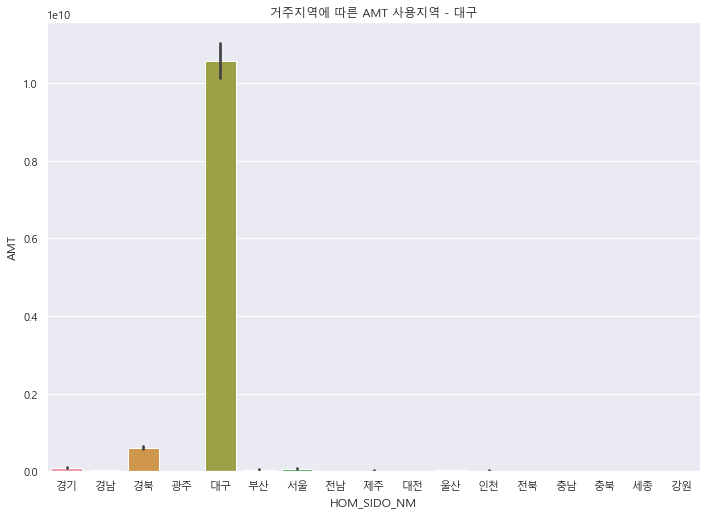

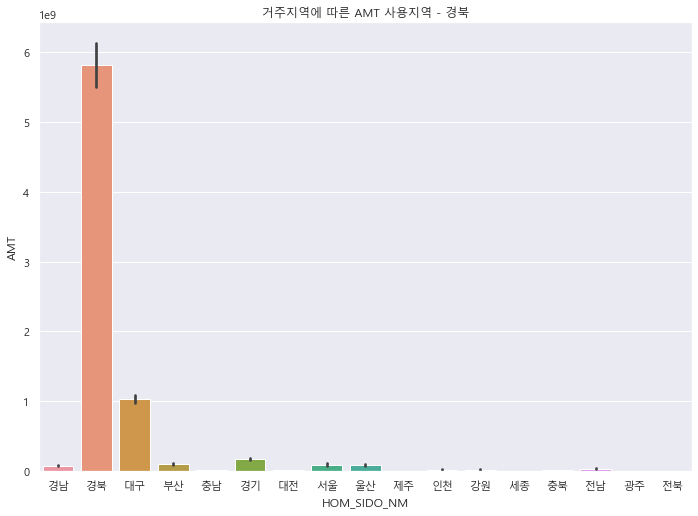

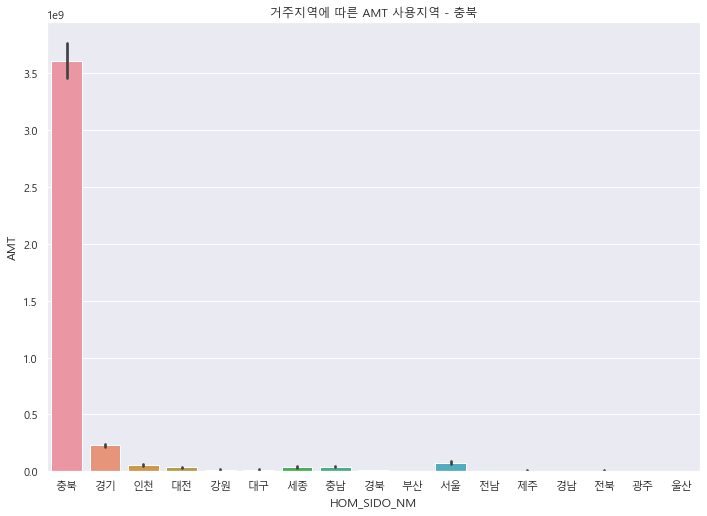

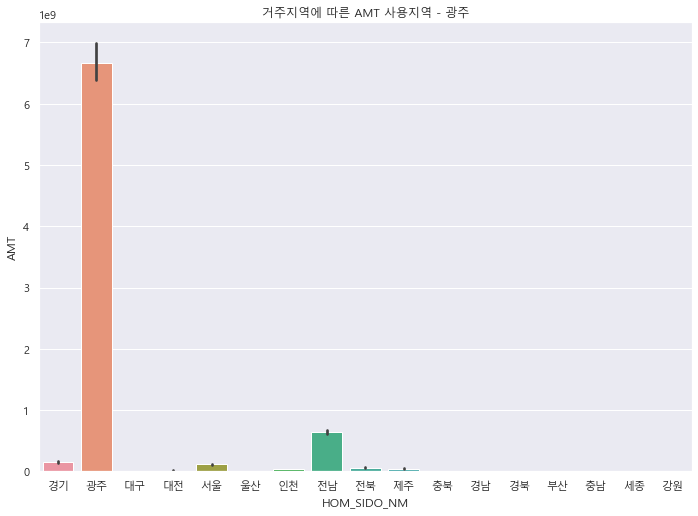

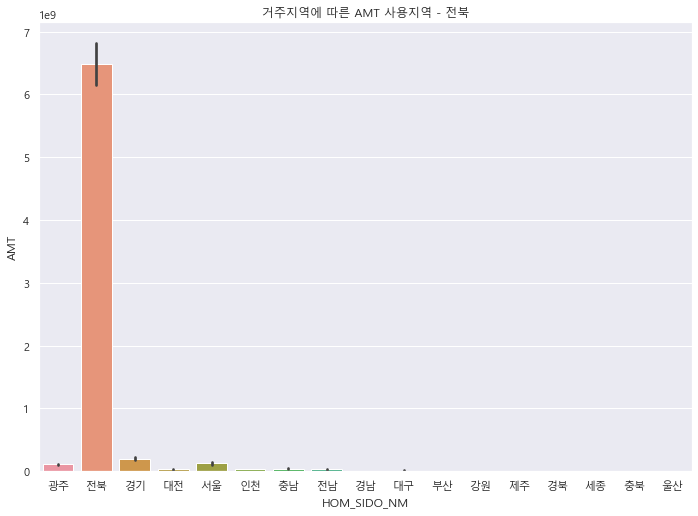

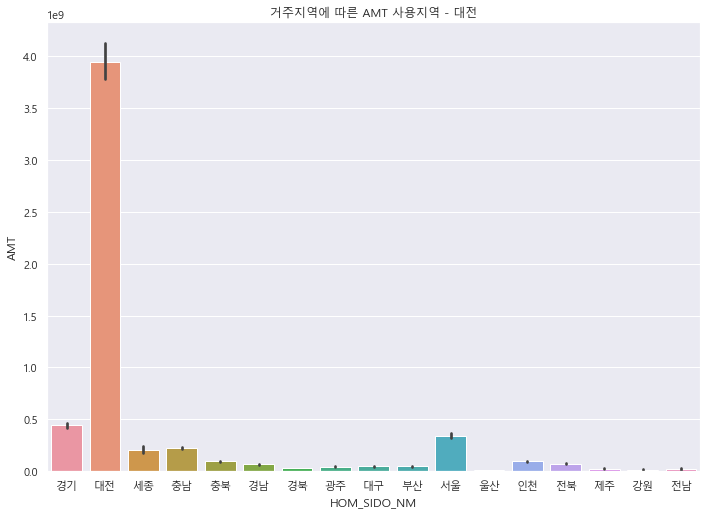

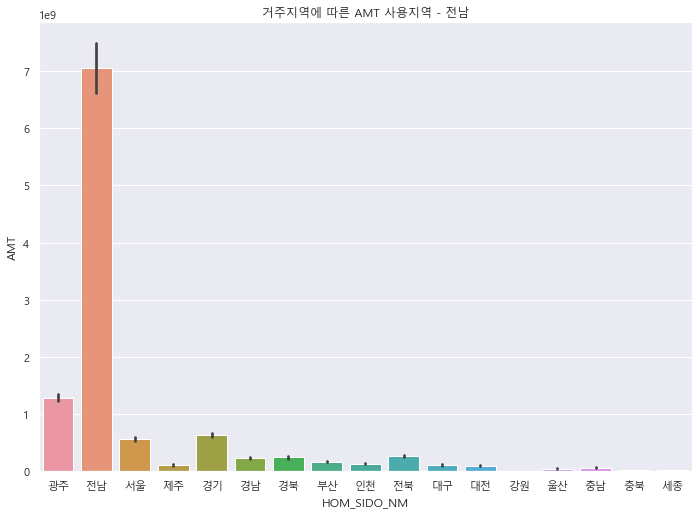

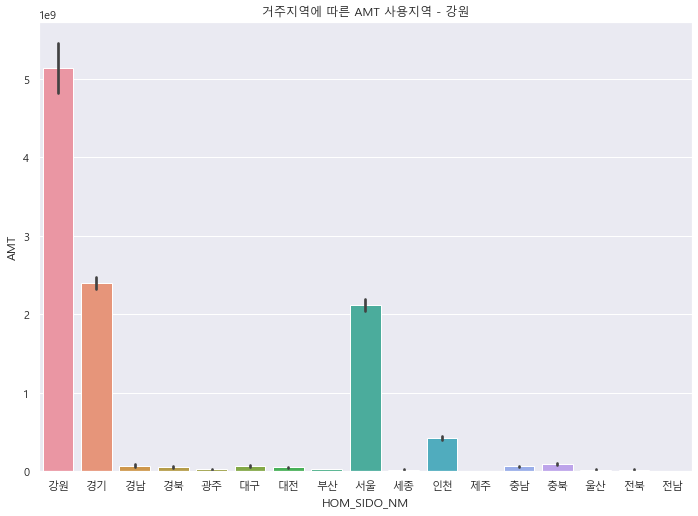

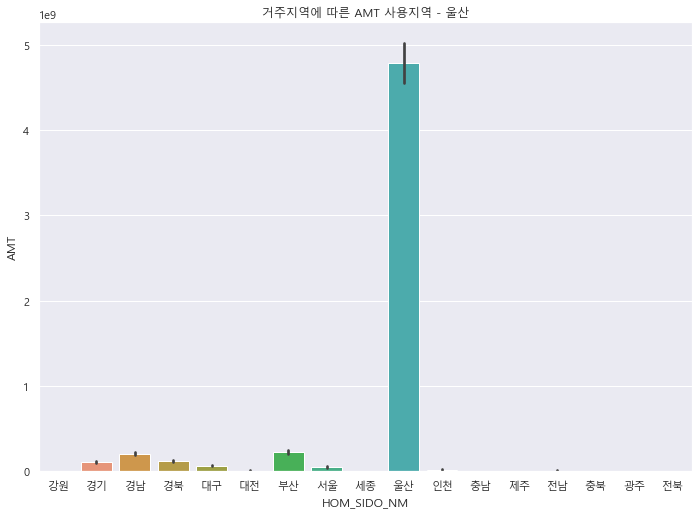

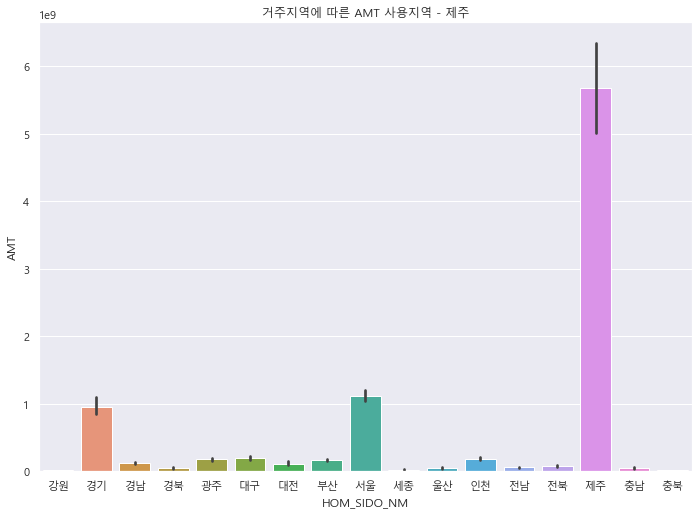

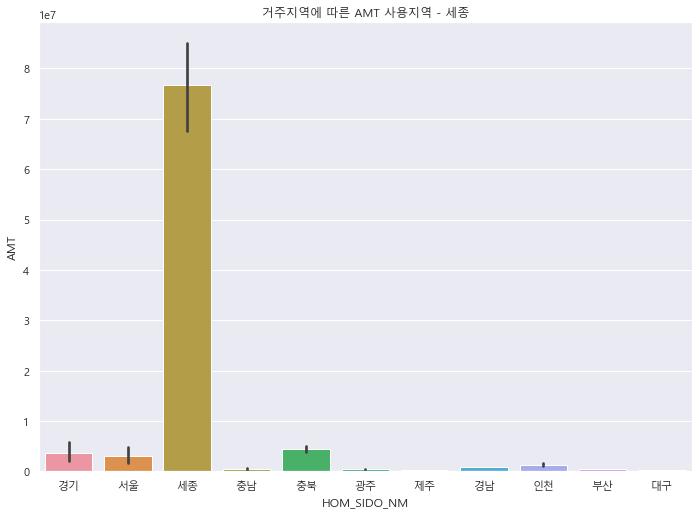

In [17]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()

-강원!!!